In [98]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import json

In [99]:
df = pd.read_csv('desktop/scrape.csv')

In [100]:
df.isna().sum()

Unnamed: 0      0
Listing         0
Price           0
SQMUP         315
Room Info     315
Area          315
Location        0
Ads             0
dtype: int64

In [101]:
df = df.dropna()

In [102]:
df = df[[
    #'Unnamed: 0', 
    'Listing', 'Price', 'SQMUP', 'Room Info', 'Area','Location', 'Ads'
]].copy()

In [103]:
df.duplicated(subset=['Listing', 'Price', 'Area']).sum()

168

In [104]:
df = df.loc[~df.duplicated(subset=['Listing', 'Price', 'Area'])].reset_index(drop=True).copy()

In [105]:
df['Price'] = pd.to_numeric(df['Price'].str.replace('[\xa0, ]', '', regex=True))

df['SQMUP'] = pd.to_numeric(df['SQMUP'].str.replace('[\xa0, ]', '', regex=True))

df['Room Info'] = pd.to_numeric(df['Room Info'].str.replace('[\xa0+,]', '', regex=True))

In [106]:
df.dtypes

Listing       object
Price          int64
SQMUP          int64
Room Info      int64
Area         float64
Location      object
Ads           object
dtype: object

In [107]:
pd.set_option('display.float_format', '{:.3f}'.format)
df.describe()

,Price,SQMUP,Room Info,Area
count,3267.000,3267.000,3267.000,3267.000
mean,1976517.784,16725.794,2.741,70.558
std,8035822.220,5907.600,1.073,275.404
min,224500.000,36.000,1.000,13.000
25%,650000.000,12898.000,2.000,43.280
50%,835000.000,15753.000,3.000,56.100
75%,1250000.000,19085.500,3.000,76.175
max,134602330.000,75000.000,10.000,15650.000


In [108]:
show5 = df['SQMUP'].nsmallest(5)
show5

1155      36
1099    4424
1333    4424
1724    4424
2018    4424
Name: SQMUP, dtype: int64

In [109]:
check = df[df.index == 1155 ]
check

,Listing,Price,SQMUP,Room Info,Area,Location,Ads
1155,Małe mieszkanie przy Alejach Jerezolimskich,567469,36,2,15650.000,"al. Aleje Jerozolimskie, Stare Włochy, Włochy,...",NEUF Sp. z o.oBiuro nieruchomości


In [110]:
df = df.drop([1137, 350, 1144, 589, 558, 2185, 1476, 1384, 563, 262, 947, 1143, 1368, 1385, 683, 139, 252, 707, 3078, 710, 714, 
              779, 825, 2700, 718, 713, 3191, 1080, 2166, 1644, 1643, 2191, 2105, 948, 2115, 2112, 1985, 2122, 2123, 950, 1155])

df = df.reset_index(drop=True).copy()

In [111]:
df['Ads'] = df['Ads'].apply(lambda x: 'Biuro nieruchomości' if 'nieruchomości' in x.lower() else x)
df['Ads'] = df['Ads'].apply(lambda x: 'Inwestycja deweloperska' if 'deweloperska' in x.lower() else x)

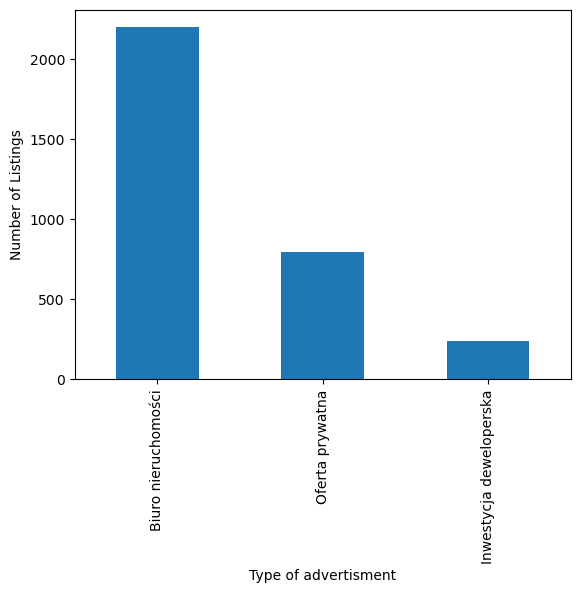

In [112]:
ax = df['Ads'].value_counts().plot(kind='bar')

ax.set_xlabel('Type of advertisment')
ax.set_ylabel('Number of Listings')

plt.show()

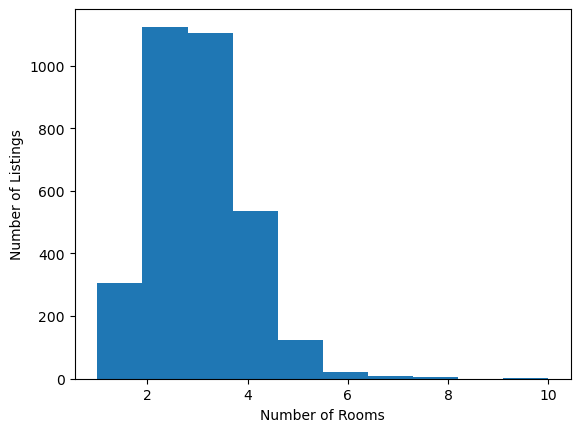

In [113]:
ax = df['Room Info'].plot(kind='hist' )

ax.set_xlabel('Number of Rooms')
ax.set_ylabel('Number of Listings')

plt.show()

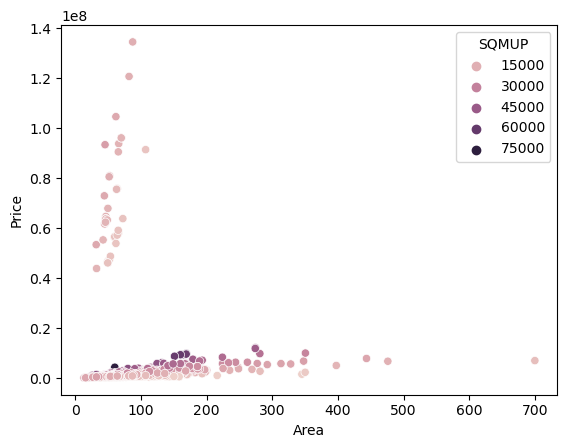

In [114]:
ax = sns.scatterplot(
        x='Area',
        y='Price',
        hue='SQMUP',
        data=df
       )

plt.show()

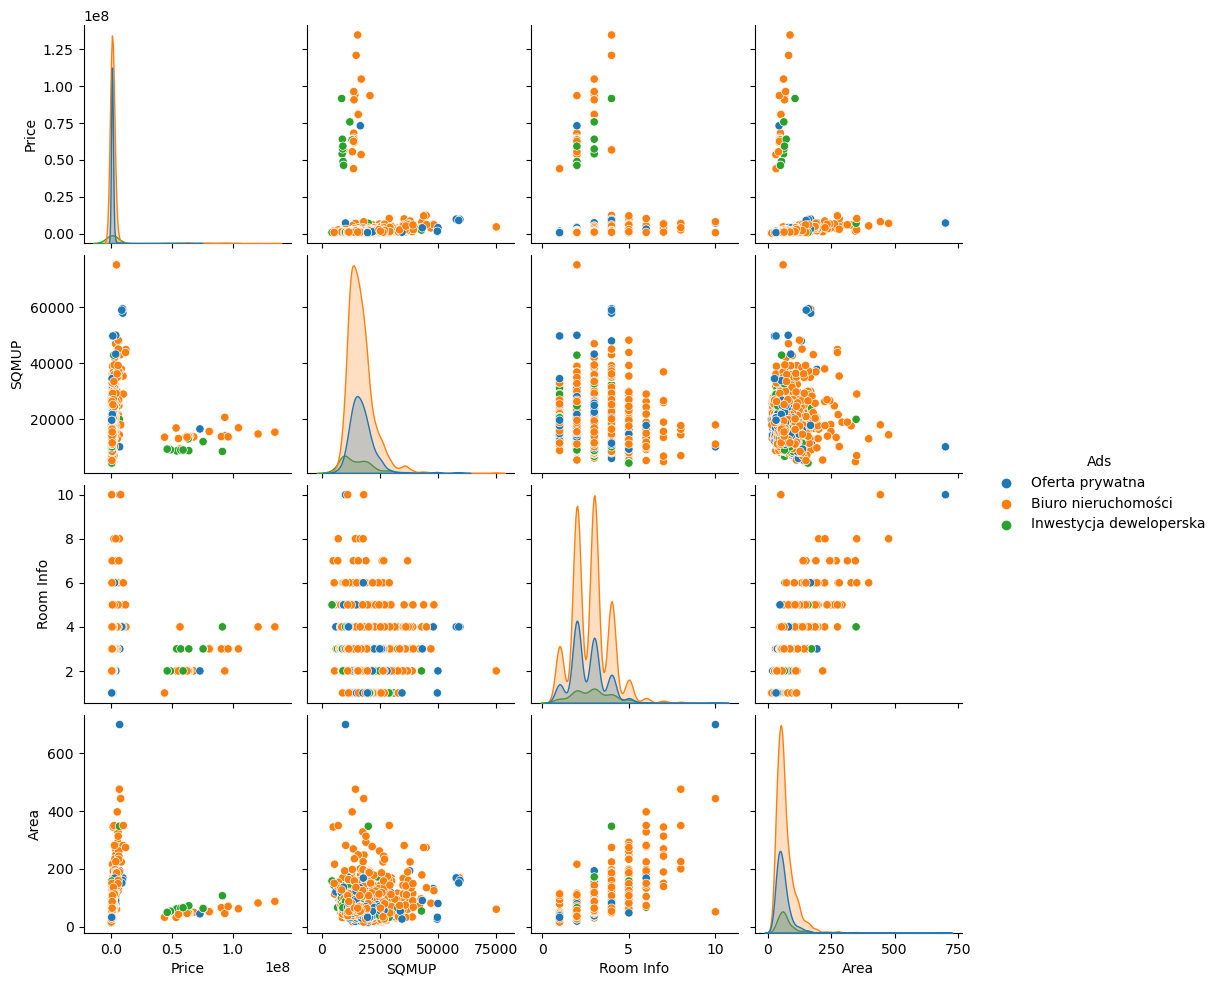

In [115]:
sns.pairplot(df, vars=['Price', 'SQMUP', 'Room Info', 'Area'], hue='Ads')

plt.show()

In [116]:
corr = df[['Price', 'SQMUP', 'Room Info', 'Area']].corr()

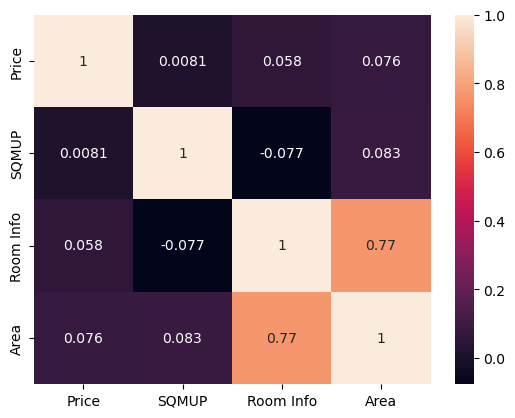

In [117]:
sns.heatmap(corr, annot=True)

plt.show()

In [118]:
districts = [
    'Bemowo', 'Białołęka', 'Bielany', 'Mokotów', 'Ochota', 'Praga-Południe', 'Praga-Północ', 'Rembertów',
    'Śródmieście', 'Targówek', 'Ursus', 'Ursynów', 'Wawer', 'Wesoła', 'Wilanów', 'Włochy', 'Wola', 'Żoliborz',
    'Marki', 'Wołomin', 'Zielonka', 'Ząbki', 'Łomianki', 'Piaseczno', 'Pruszków', 'Grodzisk', 'Legionowo', 
    'Nadarzyn', 'Konstancin-Jeziorna' ,'Piastów', 'Józefów', 'Nowy Dwór', 'Jabłonna', 'Stare Babice'
]

def change_location(location):
    for district in districts:
        if district.lower() in location.lower():
            return district
    return location

df['Location'] = df['Location'].apply(change_location)

In [119]:
df = df[~df['Location'].str.contains('Mazowiecki')].reset_index(drop=True).copy()

In [120]:
df['Index'] = range(1, len(df) + 1)
df.set_index('Index', inplace=True)

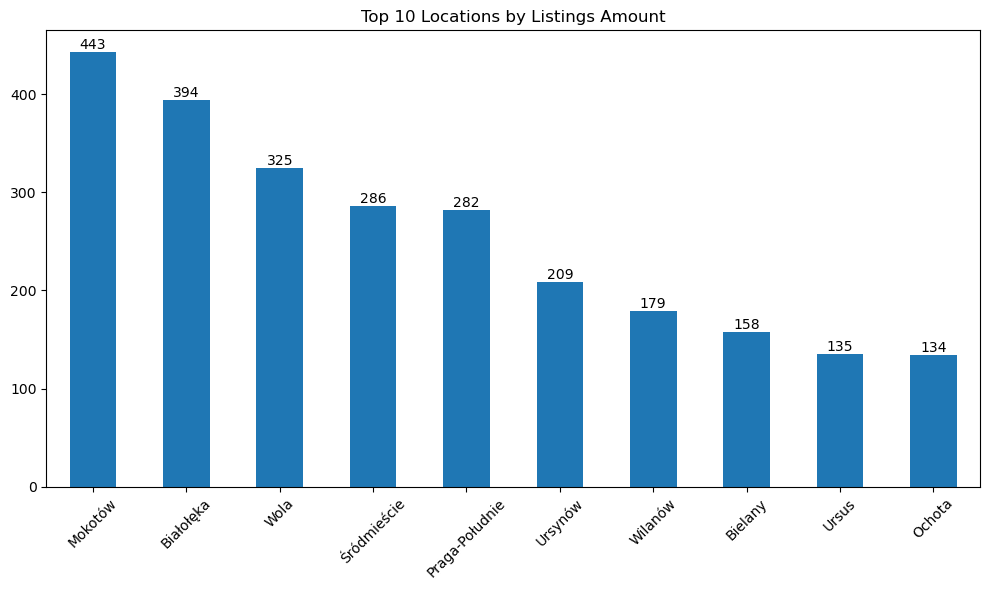

In [121]:
top10 = df['Location'].value_counts().head(10)

plt.figure(figsize=(10, 6))
ax = top10.plot(kind='bar', title='Top 10 Locations by Listings Amount')

for i, count in enumerate(top10):
    ax.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

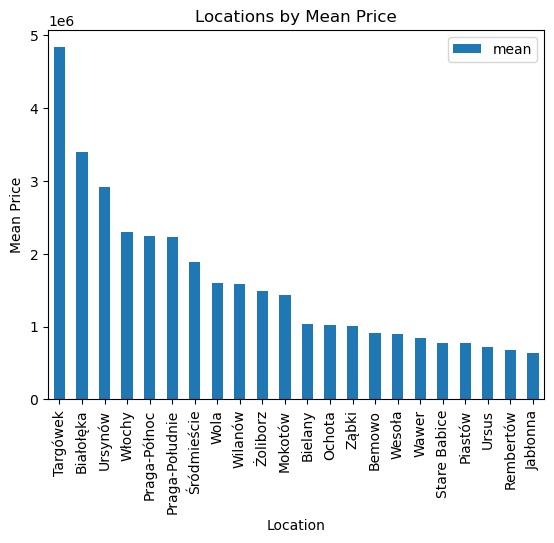

In [122]:
top_location = df.groupby('Location')['Price'].agg(['mean']).sort_values(by='mean', ascending=False).head(30)

top_location.index.name = 'Location'

top_location.sort_values(by='mean', ascending=False, inplace=True)

top_location.plot(kind='bar', 
                  title='Locations by Mean Price', 
                  xlabel='Location', 
                  ylabel='Mean Price'
                 )

plt.xticks(rotation=90)

plt.show()

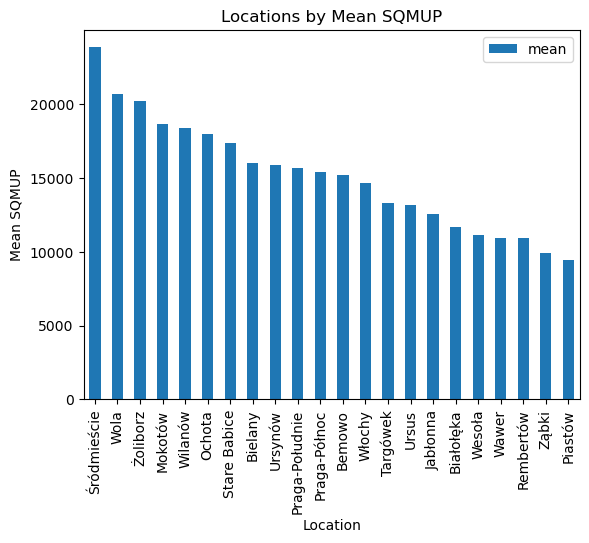

In [123]:
top_location = df.groupby('Location')['SQMUP'].agg(['mean']).sort_values(by='mean', ascending=False).head(30)

top_location.index.name = 'Location'

top_location.sort_values(by='mean', ascending=False, inplace=True)

top_location.plot(kind='bar', title='Locations by Mean SQMUP', xlabel='Location', ylabel='Mean SQMUP')
plt.xticks(rotation=90)

plt.show()

In [124]:
otodata = df.to_dict(orient='records')
file_path = 'desktop/otodom_data.json'
with open(file_path, 'w') as json_file:
    json.dump(otodata, json_file, indent=4)